In [1]:
# Set up the notebook to import the library and turn off Jupyter display
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_close
set_matplotlib_close(False)

import pandas as pd
import numpy as np

C:\Users\David\AppData\Local\Temp\ipykernel_4464\778523821.py:5: DeprecationWarning: `set_matplotlib_close` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_close()`
  set_matplotlib_close(False)


In [3]:
df = pd.read_csv('./assets/quartet.csv')
df.head()

,x1,y1,x2,y2,x3,y3,x4,y4
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47


In [4]:
# THe point of ANacombe's quartet is to demonstrate that a certain summary statistics might look the same or nearly the same between
# different values, but that when we graphically examine them, they look quite different.
# Calculate the mean of each column

df.agg(np.mean)

x1    9.000000
y1    7.500909
x2    9.000000
y2    7.500909
x3    9.000000
y3    7.500000
x4    9.000000
y4    7.500909
dtype: float64

In [7]:
import scipy.stats as stats

for i in range(1, 5):
    print("pearson for {} values is {}".format(i, stats.pearsonr(df['x{}'.format(i)], df['y{}'.format(i)])))


pearson for 1 values is PearsonRResult(statistic=0.81642051634484, pvalue=0.0021696288730787875)
pearson for 2 values is PearsonRResult(statistic=0.8162365060002427, pvalue=0.002178816236910804)
pearson for 3 values is PearsonRResult(statistic=0.8162867394895982, pvalue=0.002176305279228026)
pearson for 4 values is PearsonRResult(statistic=0.8165214368885029, pvalue=0.0021646023471972166)


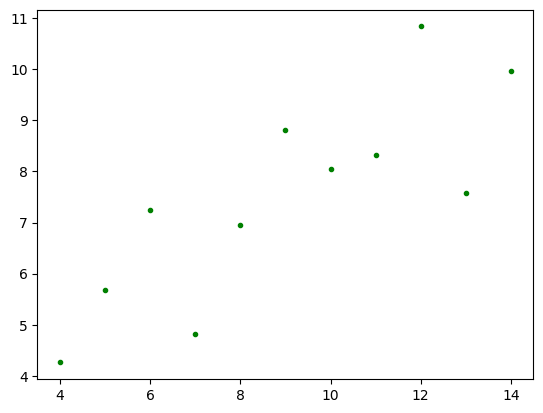

In [8]:
# Even the correlation are almost identical

# Lets check the first series using a scatter plot.
plt.figure()
plt.plot(df['x1'], df['y1'], 'g.')
plt.show()

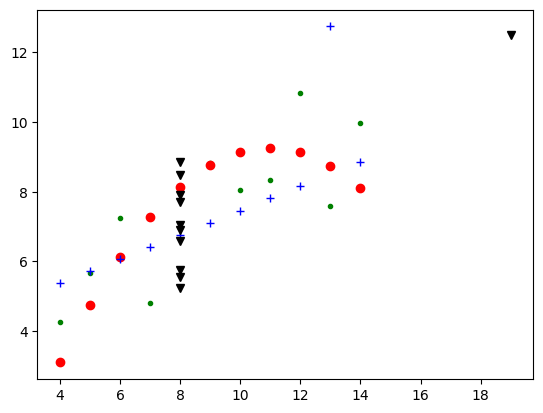

In [9]:
plt.plot(df['x2'], df['y2'], 'ro')
plt.plot(df['x3'], df['y3'], 'b+')
plt.plot(df['x4'], df['y4'], 'kv')
plt.show()

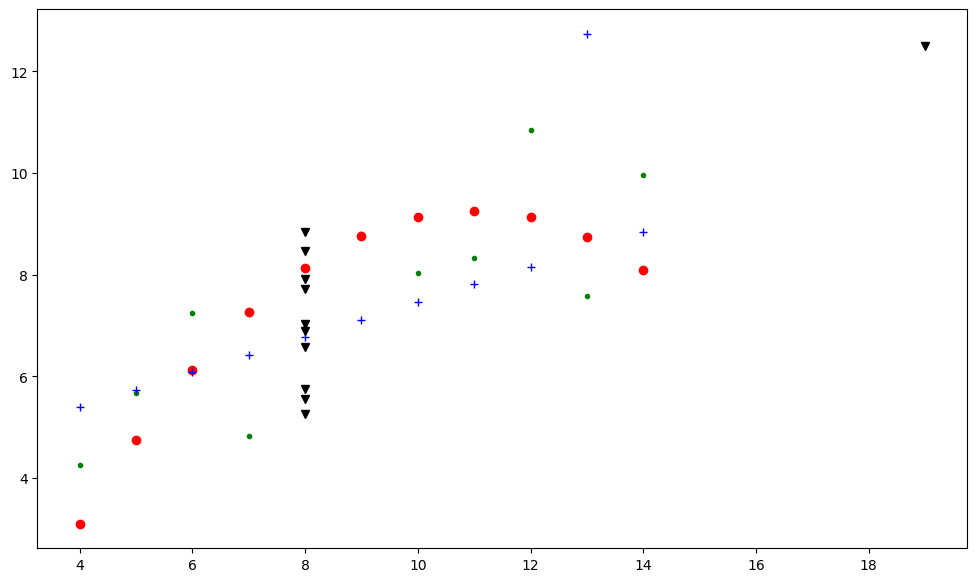

In [10]:
#Let's change the size of the figure to get a better sense of what has happened
plt.gcf().set_size_inches(12,7)
plt.show()

In [ ]:
# Now we see that there is a realy strong outlier for the arrow, but the others are in a line.
# The red circle is sort of like a curve
# The green dots are scattered
# And the blue points are in a linear sort of line



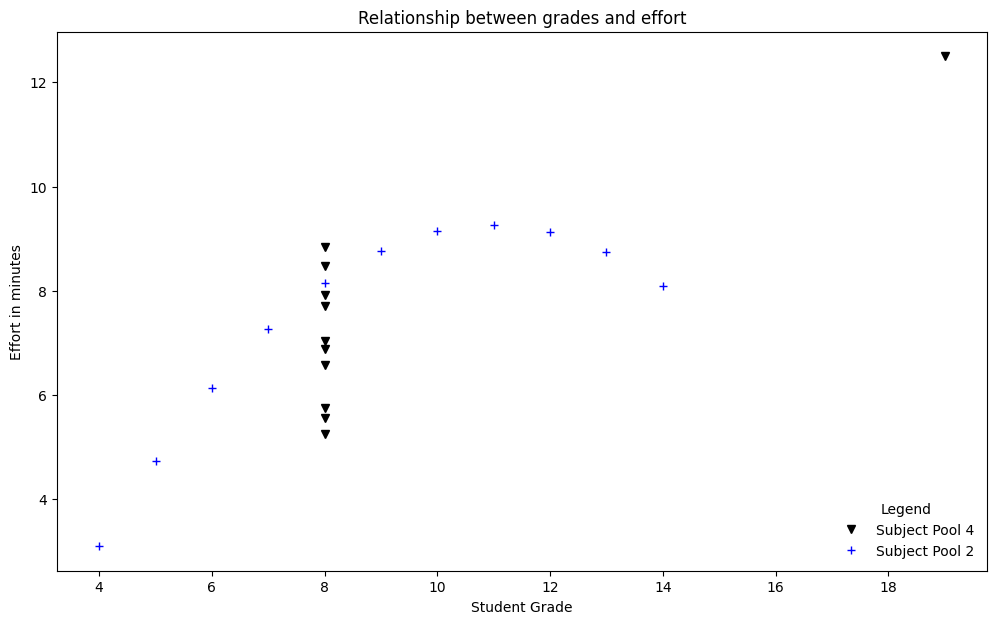

In [12]:
# To improve the visual, there are a couple things we can do. 

# Clear the axis 
plt.cla()

# Add a label and the data
plt.plot(df['x4'], df['y4'], 'kv', label='Subject Pool 4')
plt.plot(df['x2'], df['y2'], 'b+', label='Subject Pool 2')

# Add a descriptive text
plt.title('Relationship between grades and effort')
plt.xlabel('Student Grade')
plt.ylabel('Effort in minutes')

# Create a legend
plt.legend(loc=4, frameon=False, title='Legend')

# Render the plot
plt.show()


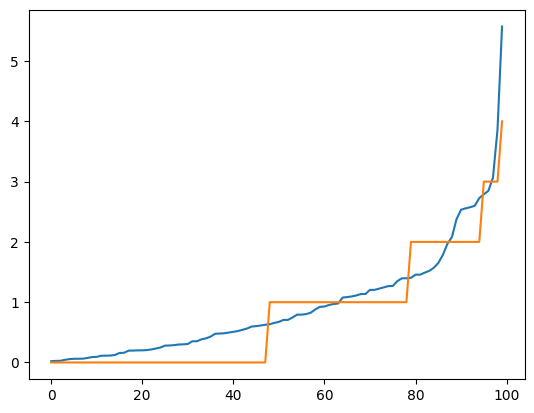

In [13]:
# Let's do another 2D plot. The line plot
plt.close()
plt.figure()

# Create datapoints
y1 = sorted(np.random.exponential(size=100))
y2 = sorted(np.random.poisson(size=100))

x = np.arange(100)

# Plot the data
plt.plot(x, y1)
plt.plot(x, y2)
plt.show()

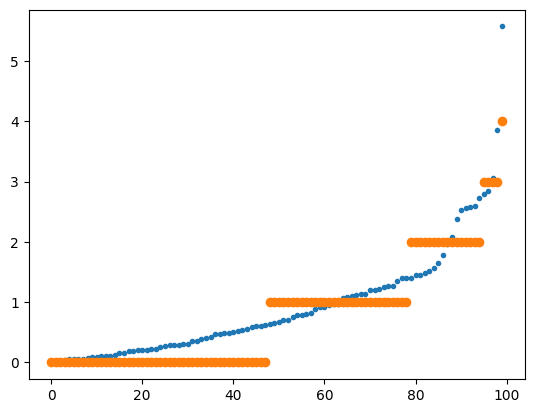

In [15]:
# Say we want to plot them with just a scatter plot 
plt.cla()
plt.plot(x,y1,'.')
plt.plot(x,y2,'o')
plt.show()

In [16]:
# Lets try things out with another dataset
df18 = pd.read_csv('./assets/1892728.csv')
df19 = pd.read_csv('./assets/1892713.csv')
df19.head()


,STATION,NAME,DATE,AWND,PGTM,PRCP,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT08
0,USW00094889,"ANN ARBOR MUNICIPAL AIRPORT, MI US",2019-01-01,6.93,229,0.0,NaN,37,27,270,290,18.1,23.9,1.0,NaN,NaN,NaN
1,USW00094889,"ANN ARBOR MUNICIPAL AIRPORT, MI US",2019-01-02,6.93,2320,0.0,NaN,33,26,230,240,23.0,29.1,1.0,NaN,NaN,NaN
2,USW00094889,"ANN ARBOR MUNICIPAL AIRPORT, MI US",2019-01-03,11.41,230,0.0,NaN,37,29,240,260,19.9,28.0,NaN,NaN,NaN,NaN
3,USW00094889,"ANN ARBOR MUNICIPAL AIRPORT, MI US",2019-01-04,5.37,1344,0.0,NaN,49,26,200,190,15.0,19.0,NaN,NaN,NaN,NaN
4,USW00094889,"ANN ARBOR MUNICIPAL AIRPORT, MI US",2019-01-05,7.16,2249,0.0,NaN,50,23,280,290,17.0,23.9,1.0,NaN,NaN,1.0


In [17]:
df = pd.concat([df18, df19])

# Reset the index
df = df.reset_index()

# Pull the year out of date.
df = pd.merge(df, df['DATE'].str.extract("(?P<year>.{4}).(?P<month_day>.{5})"), left_index=True, right_index=True)

df = df[['year','month_day','TMAX','TMIN']]


df.head()

,year,month_day,TMAX,TMIN
0,2018,01-01,12.0,-12.0
1,2018,01-02,14.0,0.0
2,2018,01-03,16.0,0.0
3,2018,01-04,16.0,0.0
4,2018,01-05,7.0,-13.0


In [18]:
# Setup our figure
def plot_temp(year):
    plt.close()
    plt.plot(df.where(df["year"]==year).dropna()['TMAX'], label="{} Maximum Temperature".format(year))
    plt.plot(df.where(df["year"]==year).dropna()['TMIN'], label="{} Minimum Temperature".format(year))


    plt.legend(loc=4, frameon=4, title='Legend')

    plt.ylabel("Temperature")
    plt.xlabel("Day")
    plt.show()

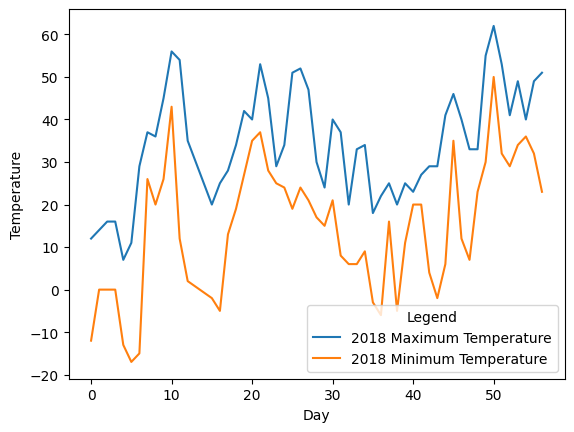

In [20]:
plot_temp("2018")

In [23]:
# Setup our figure, but this time set the figure size
def plot_temp(year):
    plt.close()
    plt.figure(figsize=(10,6))
    plt.plot(df.where(df["year"]==year).dropna()['TMAX'], label="{} Maximum Temperature".format(year))
    plt.plot(df.where(df["year"]==year).dropna()['TMIN'], label="{} Minimum Temperature".format(year))


    plt.legend(loc=0, frameon=False, title='Legend') # 0 means to put it in the best place

    plt.ylabel("Temperature")
    plt.xlabel("Day")
    plt.title('Daily Temperature for {}'.format(year))

    # Shade between the values
    plt.gca().fill_between(
        df.where(df['year'] == year).dropna().index, 
        df.where(df['year'] ==year).dropna()['TMAX'],
        df.where(df['year'] == year).dropna()['TMIN'],
        facecolor = 'blue', alpha=0.25
    )
    plt.show()

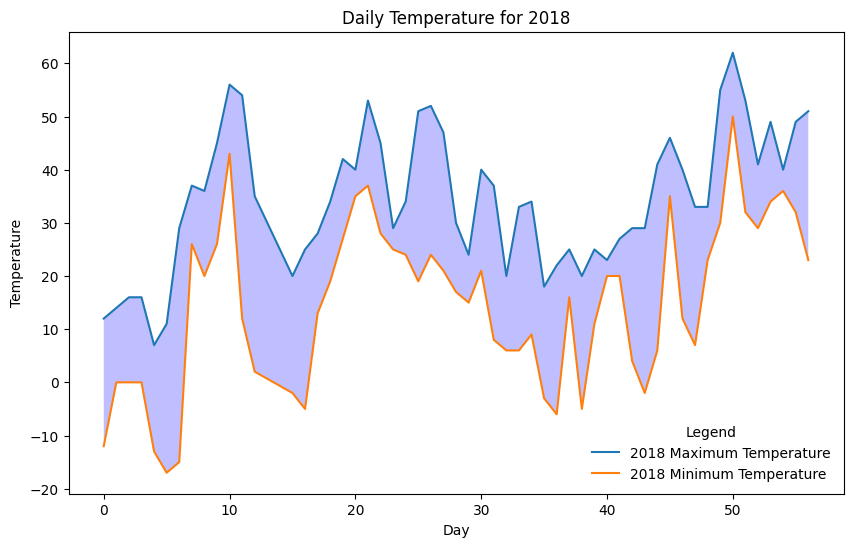

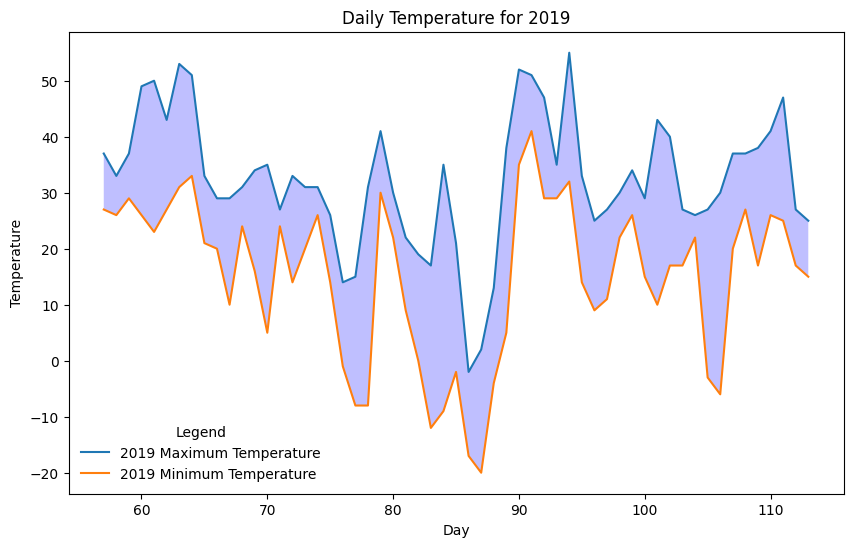

In [24]:
plot_temp("2018")
plot_temp("2019")

C:\Users\David\AppData\Local\Temp\ipykernel_4464\1989976952.py:2: DeprecationWarning: `set_matplotlib_close` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_close()`
  set_matplotlib_close(True)


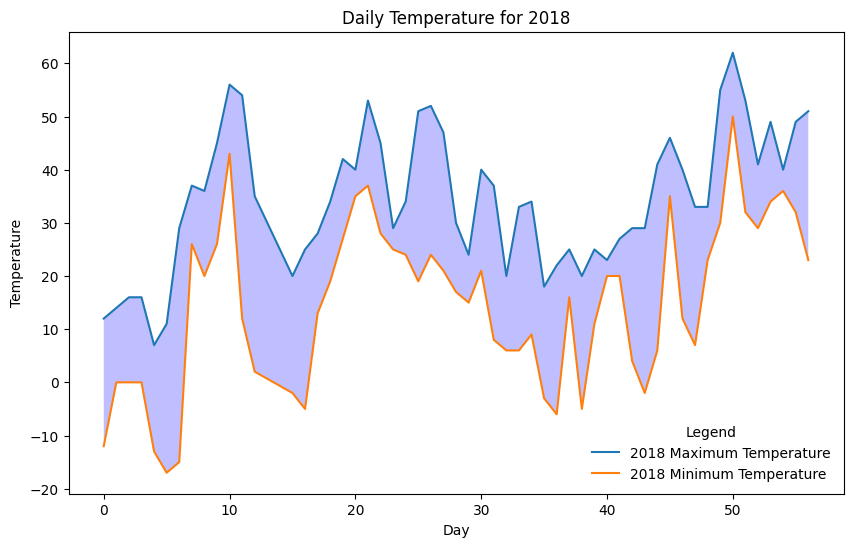

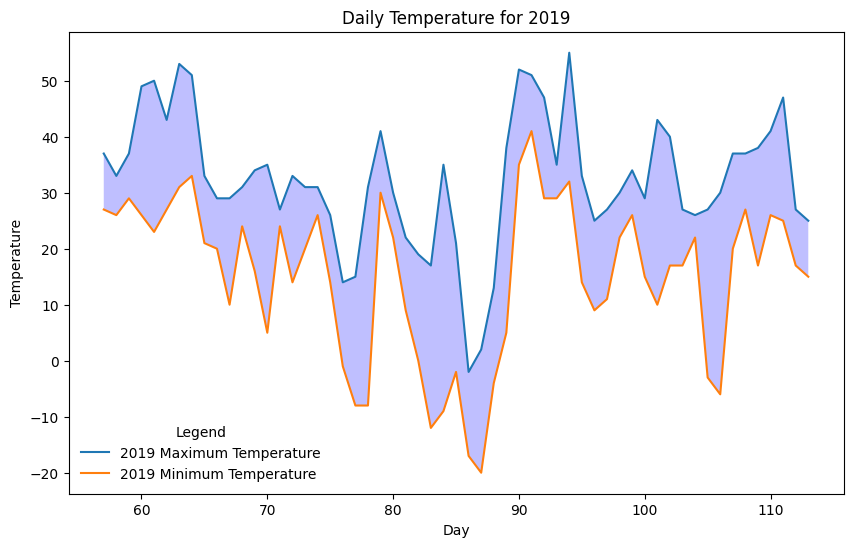

In [25]:
# Lets try to do it again but set matplotlib_close to True. To see how Jupyter interacts with the plots
set_matplotlib_close(True)

plot_temp("2018")
plot_temp("2019")

In [27]:
# In this case, not so much, but underneath Jupyter closed off the figure and theyre not available for editing

plt.get_fignums()

[]

<AxesSubplot: >

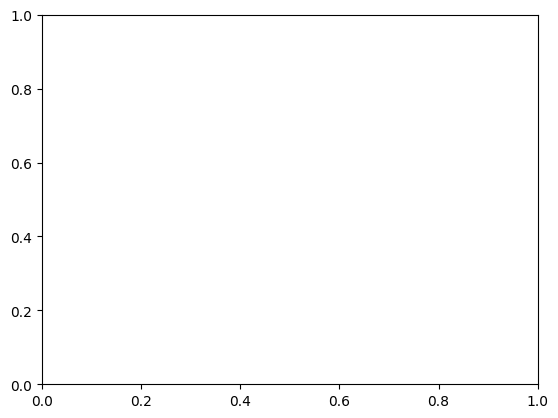

In [28]:
# Returns nothing because jupyter closed it off
plt.gca()

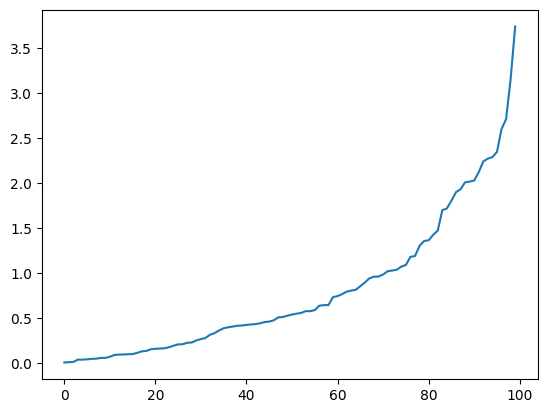

In [29]:
# The update eliminates the eneed to call plt.show()

plt.plot(range(0,100), sorted(np.random.exponential(size=100)))